<a href="https://colab.research.google.com/github/akash7s/pythonprojects/blob/main/NF_ToN_IoTanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
file_path = '/content/drive/MyDrive/Colab Notebooks/NF-ToN-IoT.csv'

In [ ]:

import pandas as pd
import io

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NF-ToN-IoT.csv')
print(df)

         IPV4_SRC_ADDR  L4_SRC_PORT    IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  \
0        192.168.1.195        63318   52.139.250.253          443         6   
1         192.168.1.79        57442    192.168.1.255        15600        17   
2         192.168.1.79        57452  239.255.255.250        15600        17   
3        192.168.1.193          138    192.168.1.255          138        17   
4         192.168.1.79        51989    192.168.1.255        15600        17   
...                ...          ...              ...          ...       ...   
1379269   192.168.1.31        58032    192.168.1.194           80         6   
1379270   192.168.1.31        58034    192.168.1.194           80         6   
1379271   192.168.1.31        58036    192.168.1.194           80         6   
1379272   192.168.1.31        58038    192.168.1.194           80         6   
1379273   192.168.1.31        58040    192.168.1.194           80         6   

         L7_PROTO  IN_BYTES  OUT_BYTES  IN_PKTS  OU

In [ ]:
column_names = df.columns
print(column_names)

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379274 entries, 0 to 1379273
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1379274 non-null  object 
 1   L4_SRC_PORT                 1379274 non-null  int64  
 2   IPV4_DST_ADDR               1379274 non-null  object 
 3   L4_DST_PORT                 1379274 non-null  int64  
 4   PROTOCOL                    1379274 non-null  int64  
 5   L7_PROTO                    1379274 non-null  float64
 6   IN_BYTES                    1379274 non-null  int64  
 7   OUT_BYTES                   1379274 non-null  int64  
 8   IN_PKTS                     1379274 non-null  int64  
 9   OUT_PKTS                    1379274 non-null  int64  
 10  TCP_FLAGS                   1379274 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1379274 non-null  int64  
 12  Label                       1379274 non-null  int64  
 1

In [ ]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0,Benign
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0,Benign
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0,Benign
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign


In [ ]:
df.tail()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
1379269,192.168.1.31,58032,192.168.1.194,80,6,7.0,216,180,4,3,18,9433,1,ddos
1379270,192.168.1.31,58034,192.168.1.194,80,6,7.0,216,180,4,3,18,9221,1,ddos
1379271,192.168.1.31,58036,192.168.1.194,80,6,7.0,216,180,4,3,18,9656,1,ddos
1379272,192.168.1.31,58038,192.168.1.194,80,6,7.0,216,180,4,3,18,10046,1,ddos
1379273,192.168.1.31,58040,192.168.1.194,80,6,7.0,216,180,4,3,18,10485,1,ddos


In [ ]:
df.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06
mean,4.129073e+04,7.091114e+03,6.955538e+00,3.208614e+01,1.466229e+03,2.745434e+03,1.800829e+01,1.071157e+01,2.121593e+01,6.633697e+03,8.040426e-01
std,1.767886e+04,1.673668e+04,3.174542e+00,4.088253e+01,1.779632e+05,1.105589e+05,2.885741e+03,1.454466e+03,8.196017e+00,1.197320e+05,3.969361e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.662000e+04,8.000000e+01,6.000000e+00,7.000000e+00,1.120000e+02,6.000000e+01,2.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00
50%,4.552400e+04,8.000000e+01,6.000000e+00,7.000000e+00,4.580000e+02,6.960000e+02,4.000000e+00,4.000000e+00,2.600000e+01,9.400000e+01,1.000000e+00
75%,5.381000e+04,4.430000e+02,6.000000e+00,9.100000e+01,5.540000e+02,2.239000e+03,5.000000e+00,6.000000e+00,2.700000e+01,3.820000e+02,1.000000e+00
max,6.553500e+04,6.553400e+04,5.800000e+01,2.510000e+02,7.941590e+07,7.016518e+07,1.221043e+06,1.349068e+06,2.190000e+02,4.294849e+06,1.000000e+00


In [ ]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:
df.Label.value_counts()

Label
1    1108995
0     270279
Name: count, dtype: int64

In [ ]:
df.Attack.value_counts()

Attack
injection     468539
ddos          326345
Benign        270279
password      156299
xss            99944
scanning       21467
dos            17717
backdoor       17247
mitm            1295
ransomware       142
Name: count, dtype: int64

In [ ]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")
df.dropna(inplace=True)

0 rows with at least one NaN to remove


In [ ]:
print(df.duplicated().sum(), "fully duplicate rows to remove")
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

221280 fully duplicate rows to remove


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157994 entries, 0 to 1157993
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1157994 non-null  int64  
 1   L4_DST_PORT                 1157994 non-null  int64  
 2   PROTOCOL                    1157994 non-null  int64  
 3   L7_PROTO                    1157994 non-null  float64
 4   IN_BYTES                    1157994 non-null  int64  
 5   OUT_BYTES                   1157994 non-null  int64  
 6   IN_PKTS                     1157994 non-null  int64  
 7   OUT_PKTS                    1157994 non-null  int64  
 8   TCP_FLAGS                   1157994 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  1157994 non-null  int64  
 10  Label                       1157994 non-null  int64  
 11  Attack                      1157994 non-null  object 
dtypes: float64(1), int64(10), object(1)
memory usage: 106.0+

In [ ]:
df.shape

(1379274, 14)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

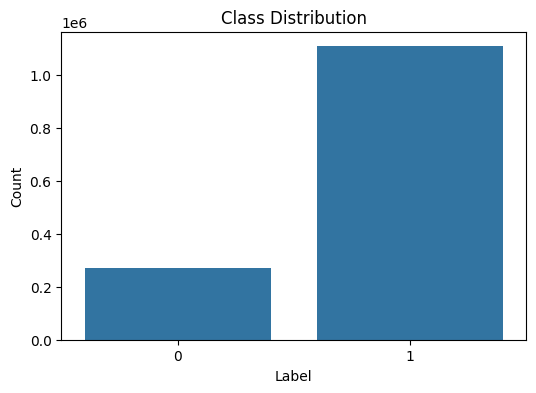

In [ ]:
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

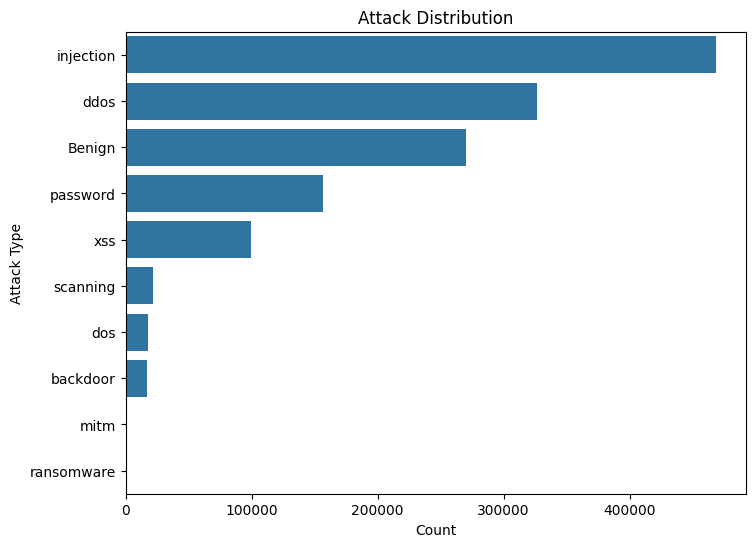

In [ ]:
# Attack Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Attack', order=df['Attack'].value_counts().index)
plt.title('Attack Distribution')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

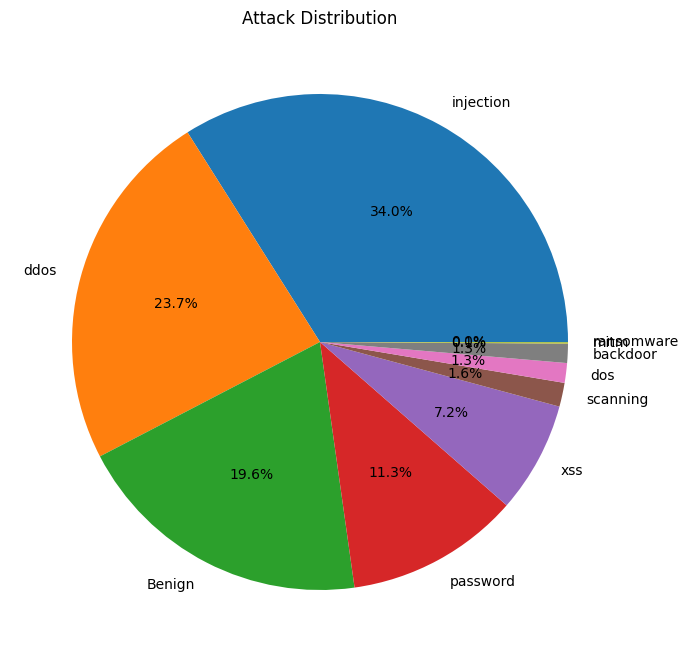

In [ ]:
plt.figure(figsize=(8, 9))
df['Attack'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Attack Distribution')
plt.ylabel('')
plt.show()

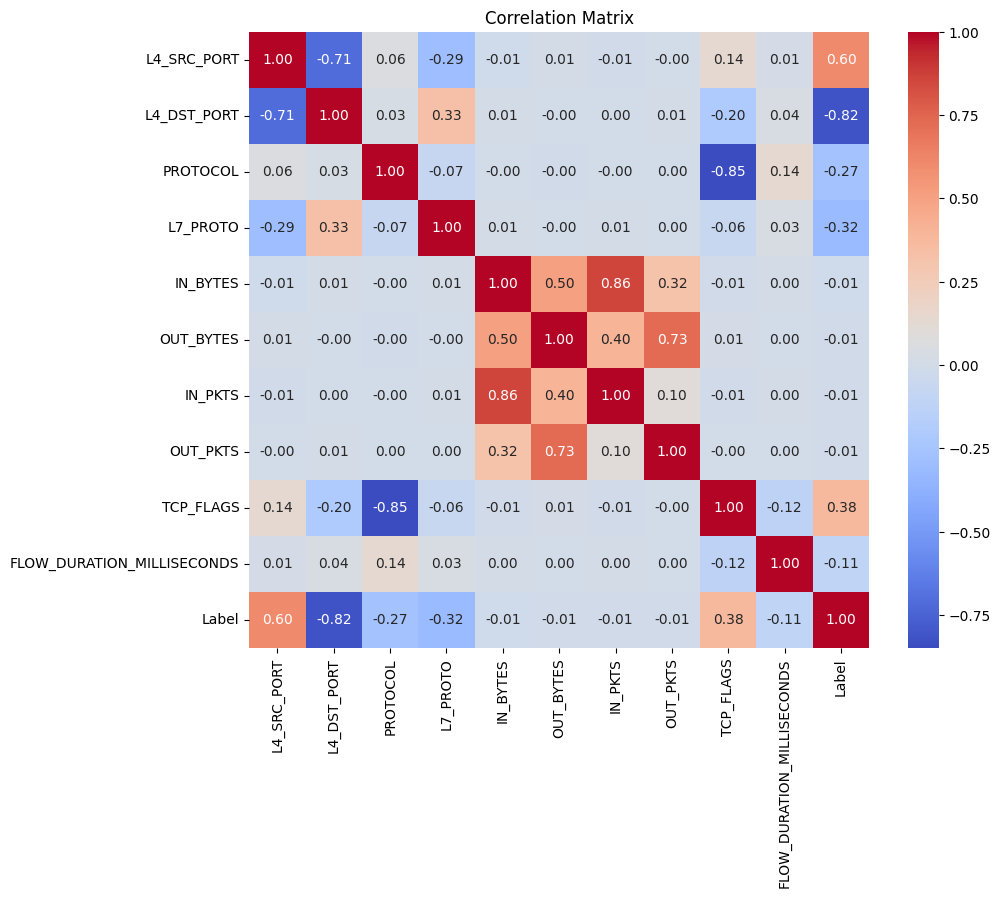

In [ ]:
# Exclude non-numeric columns before generating the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


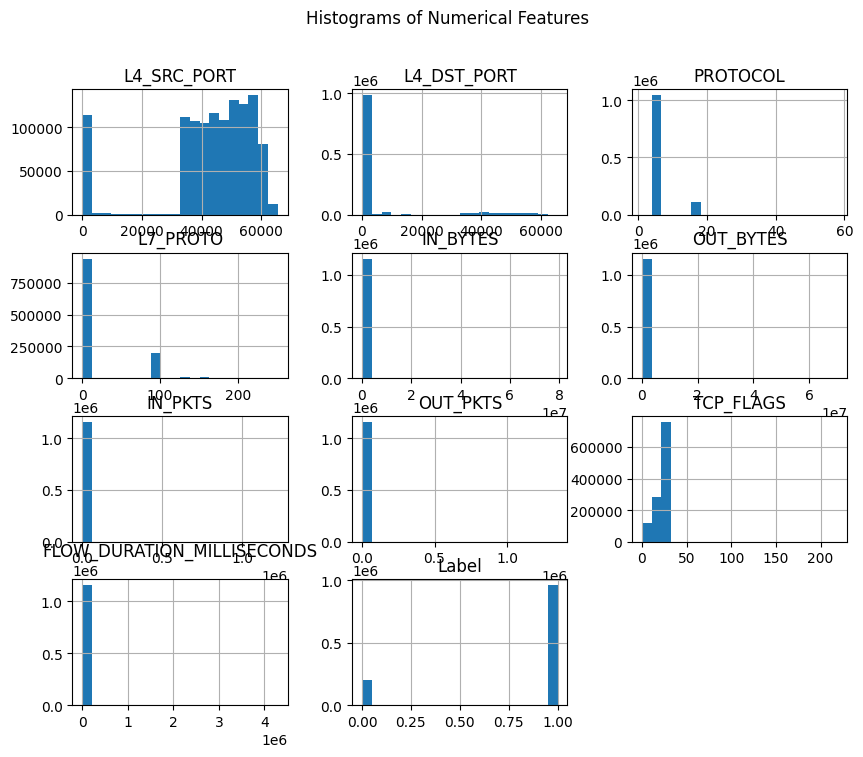

In [ ]:
# Histograms
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [ ]:
# Define clear labels for protocols
protocol_labels = {
    1: 'ICMP',
    2: 'IGMP',
    6: 'TCP',
    17: 'UDP',
    58: 'IPv6-ICMP',
    # Add more protocols if necessary
}

plt.figure(figsize=(12, 8))
protocol_attack_counts = df.groupby(['PROTOCOL', 'Attack']).size().unstack(fill_value=0)
protocol_attack_counts.plot(kind='bar', stacked=True)

# Set x-axis labels using protocol labels dictionary
plt.xticks(range(len(protocol_labels)), [protocol_labels.get(p, p) for p in protocol_attack_counts.index], rotation=45)

plt.title('Protocol vs. Attack Type')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(title='Attack Type')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
